<a href="https://colab.research.google.com/github/mag381/AI/blob/main/Calif_house.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#必要なライブラリをインポート
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [ ]:
# 真値を予測値に対してプロットする
def cmp_plt(y_train_yosoku, y_train, y_test_yosoku, y_test):
  plt.scatter(y_train_yosoku, y_train, label="train")
  plt.scatter(y_test_yosoku, y_test, label="test")
  plt.xlabel("yosoku")
  plt.ylabel("shin-chi")
  plt.title("Hikaku")
  plt.legend()
  plt.show()

In [ ]:
# 外れ量（予測値－真値）を予測値に対してプロットする
def res_plt(y_train_yosoku, y_train, y_test_yosoku, y_test):
  plt.scatter(y_train_yosoku, y_train_yosoku - y_train, label="train")
  plt.scatter(y_test_yosoku, y_test_yosoku - y_test, label="test")
  plt.xlabel("yosoku")
  plt.ylabel("yosoku - sinchi")
  plt.title("Yosoku_Hazure")
  plt.legend()
  plt.show()

In [ ]:
# 予測誤差を評価する
def get_eval_score(y_correct,y_yosoku):
  mae = mean_absolute_error(y_correct,y_yosoku)
  mse = mean_squared_error(y_correct,y_yosoku)
  rmse = np.sqrt(mse)
  r2score = r2_score(y_correct,y_yosoku)
  print(f" mean absolute error = {mae}")
  print(f" mean squared error = {mse}")
  print(f" root mean squared error = {rmse}")
  print(f" R2(kettei keisuu) = {r2score}")

In [ ]:
#物件を保存したファイル読み込む
from google.colab import files     #2 PC上のファイルを選択して、
uploaded=files.upload()            #2 Colab上のに読み込んでいる。（上の行とセットで使う）
f_name = list(uploaded.keys())[0]  #2 上の行で選択したファイル名を f_nameに代入する
# housing01.csv を読み込む

Saving housing01.csv to housing01.csv


In [ ]:
# 指定したファイルをデータフレーム(DataFrame：変数名df）に格納する
# セパレート記号を'\t'に設定して読み込む
#df = pd.read_csv(f_name, index_col=0, sep='\t', encoding='utf-8-sig') 
df = pd.read_csv(f_name, encoding='utf-8-sig') 
df.head()  # 最初の5行を表示する

,long.,lat.,age,rooms,b_rooms,population,households,median_income,house_value
0,-122.23,37.88,41,6.984127,1.023810,2.555556,126,8.3252,452600
1,-122.22,37.86,21,6.238137,0.971880,2.109842,1138,8.3014,358500
2,-122.24,37.85,52,8.288136,1.073446,2.802260,177,7.2574,352100
3,-122.25,37.85,52,5.817352,1.073059,2.547945,219,5.6431,341300
4,-122.25,37.85,52,6.281853,1.081081,2.181467,259,3.8462,342200


In [ ]:
# 使わないコラム（columns）を drop で削除する
#df = df.drop(['title','address','fee','manage','access11','access21','access22','access31','access32'], axis=1)
#df.head()  # 削除後、最初の5行を表示
# 使わないコラムはあらかじめ削除しているので、実行しない

In [ ]:
df.describe()  # データ個数、平均値、標準偏差、最小値、25,50,75%での値、最大値を表示

,long.,lat.,age,rooms,b_rooms,population,households,median_income,house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,5.429000,1.086060,3.070655,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2.474173,0.486160,10.386050,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,0.846154,0.000000,0.692308,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,4.440716,1.004393,2.429741,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,5.229129,1.048029,2.818116,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,6.052381,1.098851,3.282261,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,141.909091,34.066667,1243.333333,6082.000000,15.000100,500001.000000


In [ ]:
# もし、count数が少なりい列があったら、欠落データがあるので
# 以下の命令で、欠落データを削除する
#df = df.dropna(subset=['欠落データがある列の名前'])
# 今回は欠落データがないので、実行しない

<function matplotlib.pyplot.show(*args, **kw)>

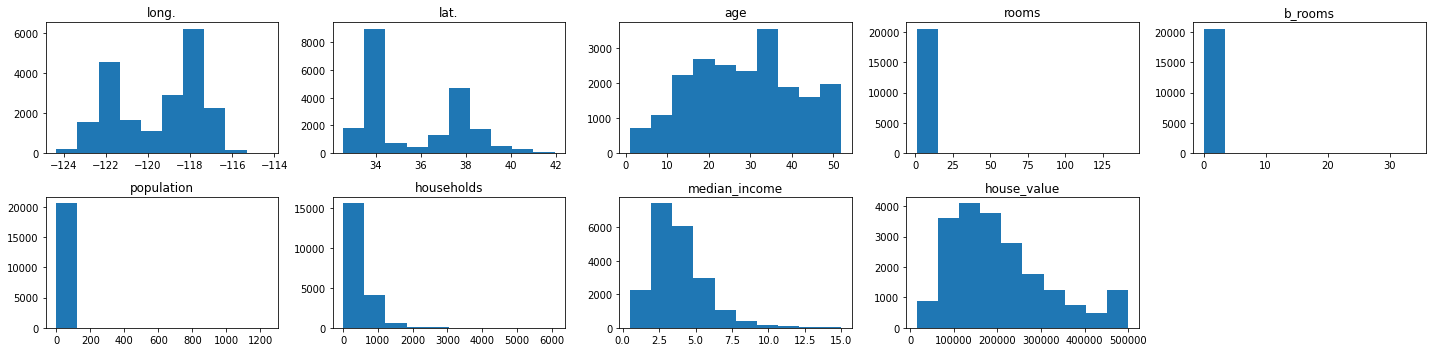

In [ ]:
# 各 columns のヒストグラムを表示する
plt.figure(figsize=(20,5))
for i, col in enumerate(df.columns):
  plt.subplot(2,5,i+1)
  plt.hist(df[col])
  plt.title(col)
plt.tight_layout()
plt.show

In [ ]:
# 相関係数を計算して df_corr に代入し、表示
df_corr = df.corr()  
display(df_corr)

,long.,lat.,age,rooms,b_rooms,population,households,median_income,house_value
long.,1.000000,-0.924664,-0.108197,-0.027540,0.011896,0.002476,0.055310,-0.015176,-0.045967
lat.,-0.924664,1.000000,0.011173,0.106389,0.069324,0.002366,-0.071035,-0.079809,-0.144160
age,-0.108197,0.011173,1.000000,-0.153277,-0.076713,0.013191,-0.302916,-0.119034,0.105623
rooms,-0.027540,0.106389,-0.153277,1.000000,0.827762,-0.004852,-0.080598,0.326895,0.151948
b_rooms,0.011896,0.069324,-0.076713,0.827762,1.000000,-0.005832,-0.054092,-0.059805,-0.045163
population,0.002476,0.002366,0.013191,-0.004852,-0.005832,1.000000,-0.027309,0.018766,-0.023737
households,0.055310,-0.071035,-0.302916,-0.080598,-0.054092,-0.027309,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.326895,-0.059805,0.018766,0.013033,1.000000,0.688075
house_value,-0.045967,-0.144160,0.105623,0.151948,-0.045163,-0.023737,0.065843,0.688075,1.000000


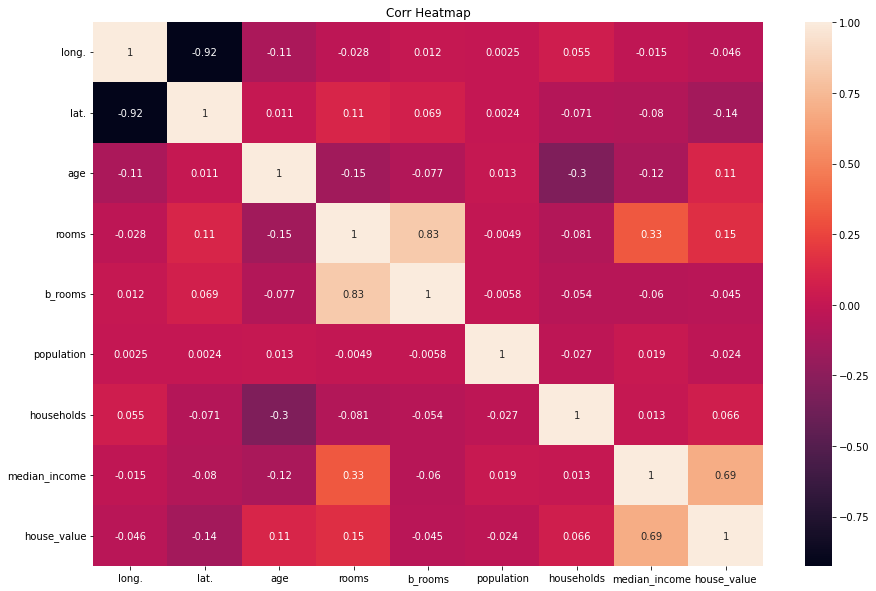

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df_corr,annot=True)
plt.title("Corr Heatmap")
plt.show()

In [ ]:
# 目的変数（賃料＋管理費）を y に代入し、
# 説明変数（その他の項目＝上記以外）を x に代入する
y=df[["house_value"]] # 賃料＋管理費
df=df.drop(["house_value"], axis=1)
x=df
print(x.head())

    long.   lat.  age     rooms   b_rooms  population  households  \
0 -122.23  37.88   41  6.984127  1.023810    2.555556         126   
1 -122.22  37.86   21  6.238137  0.971880    2.109842        1138   
2 -122.24  37.85   52  8.288136  1.073446    2.802260         177   
3 -122.25  37.85   52  5.817352  1.073059    2.547945         219   
4 -122.25  37.85   52  6.281853  1.081081    2.181467         259   

   median_income  
0         8.3252  
1         8.3014  
2         7.2574  
3         5.6431  
4         3.8462  


In [ ]:
print(y.head())

   house_value
0       452600
1       358500
2       352100
3       341300
4       342200


In [ ]:
# 訓練データとテストデータに分割する
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=0)
print(len(x_train))
print(len(x_test))

14448
6192


In [ ]:
# 訓練データとテストデータの最初の5行分を表示する
print(x_train.head())
print(x_test.head())

       long.   lat.  age     rooms   b_rooms  population  households  \
1989 -119.79  36.73   52  2.800000  0.700000    4.825000          40   
256  -122.21  37.77   43  3.671480  1.184116    3.018051         277   
7887 -118.04  33.87   17  6.478022  1.087912    3.810440         364   
4581 -118.28  34.06   17  2.518000  1.196000    3.051000        1000   
1993 -119.81  36.73   50  4.622754  1.161677    3.628743         167   

      median_income  
1989         1.9750  
256          2.2604  
7887         6.2990  
4581         1.7199  
1993         2.2206  
        long.   lat.  age     rooms   b_rooms  population  households  \
14740 -117.05  32.58   22  5.663073  1.075472    4.180593         371   
10101 -117.97  33.92   32  6.107226  0.927739    3.020979         429   
20566 -121.84  38.65   29  5.930712  1.026217    2.910112         534   
2670  -115.60  33.20   37  4.992958  1.316901    2.746479         142   
15709 -122.43  37.79   25  4.319261  1.039578    1.712401         379 

In [ ]:
# 標準化処理する
sca = StandardScaler()
x_train_sca = sca.fit_transform(x_train)
x_test_sca = sca.fit_transform(x_test)
print(x_train_sca[:3])
print(x_test_sca[:3])

[[-0.11131397  0.51396387  1.8562098  -1.146823   -0.82787035  0.25982829
  -1.1994956  -1.00030408]
 [-1.3173838   0.99993462  1.14171192 -0.76585476  0.21347417 -0.00327132
  -0.58083415 -0.84938602]
 [ 0.76084397 -0.82245571 -0.92239307  0.46102722  0.00653819  0.11210392
  -0.35373059  1.28620508]]
[[ 1.26571866 -1.43730657 -0.53250822  0.07721063 -0.02508949  0.06581932
  -0.33797944  0.14156681]
 [ 0.80488164 -0.80707125  0.26370807  0.23237326 -0.30255282 -0.00759713
  -0.18556059  0.98944483]
 [-1.13363929  1.41756538  0.02484318  0.17070885 -0.11759645 -0.01461622
   0.0903701   0.24412682]]


In [ ]:
# 訓練データを使って多重回帰の学習をする
mreg = LinearRegression().fit(x_train_sca, y_train)

In [ ]:
# 多重回帰の学習結果を使って予測値を算出して、予測値変数に代入
y_train_yosoku = mreg.predict(x_train_sca)
y_test_yosoku = mreg.predict(x_test_sca)

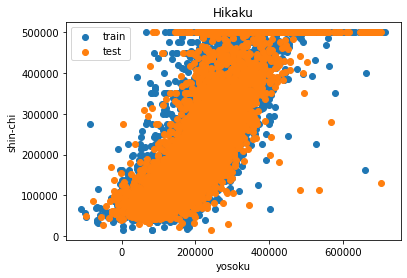

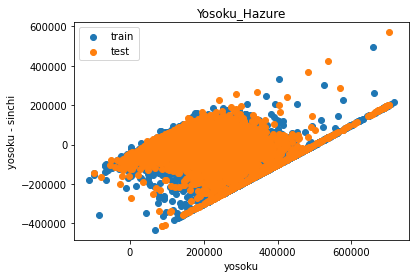

In [ ]:
# 予測値と真値を比較する（訓練データ、テストデータ）
cmp_plt(y_train_yosoku,y_train,y_test_yosoku,y_test)
# 外れ量（予測値－真値）をプロット
res_plt(y_train_yosoku,y_train,y_test_yosoku,y_test)

In [ ]:
# 重回帰予測の評価指標を表示する
print("Train data")
get_eval_score(y_train,y_train_yosoku)
print("Test data")
get_eval_score(y_test,y_test_yosoku)

Train data
 mean absolute error = 52985.54886815963
 mean squared error = 5144423660.674707
 root mean squared error = 71724.63775213303
 R2(kettei keisuu) = 0.6134416479305652
Test data
 mean absolute error = 53334.564341712525
 mean squared error = 5344656426.307715
 root mean squared error = 73107.15714831014
 R2(kettei keisuu) = 0.5991217433873666


In [ ]:
for i, (col, omomi) in enumerate(zip(df.columns, mreg.coef_[0])):
  print(f"w{i}({col}) = {omomi}")
print(f"b = {mreg.intercept_[0]}")


w0(long.) = -84597.22590792924
w1(lat.) = -87219.18371044412
w2(age) = 15064.587454683193
w3(rooms) = -17571.032114627844
w4(b_rooms) = 21259.603861525513
w5(population) = -2703.914162096371
w6(households) = 8503.648486747654
w7(median_income) = 80900.02973624025
b = 206824.62451550458


In [ ]:
# Lasso回帰を使って学習する
ls = Lasso().fit(x_train_sca, y_train)
y_train_yosoku = ls.predict(x_train_sca)
y_test_yosoku = ls.predict(x_test_sca)
print(y_train_yosoku[:5])
print(y_test_yosoku[:5])

[110107.27618371 192597.73780507 293078.04947881 149328.81324823
 129463.80631241]
[223596.8640556  281074.00090405 194525.28219921  91936.56261028
 284810.72178775]


In [ ]:
# numpy の expand_dims で次元変換（1行5列ｰ>5行1列）
y_train_yosoku = np.expand_dims(y_train_yosoku,1)
y_test_yosoku = np.expand_dims(y_test_yosoku,1)
print(y_train_yosoku[:5])
print(y_test_yosoku[:5])

[[110107.27618371]
 [192597.73780507]
 [293078.04947881]
 [149328.81324823]
 [129463.80631241]]
[[223596.8640556 ]
 [281074.00090405]
 [194525.28219921]
 [ 91936.56261028]
 [284810.72178775]]


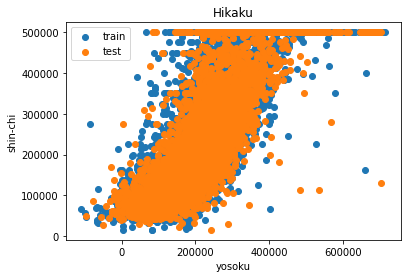

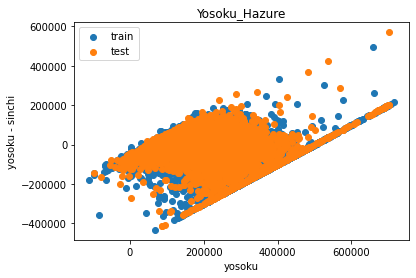

In [ ]:
# 予測値と真値を比較する（訓練データ、テストデータ）
cmp_plt(y_train_yosoku,y_train,y_test_yosoku,y_test)
# 外れ量（予測値－真値）をプロット
res_plt(y_train_yosoku,y_train,y_test_yosoku,y_test)

In [ ]:
# Lasso回帰予測の評価指標を表示する
print("Train data")
get_eval_score(y_train,y_train_yosoku)
print("Test data")
get_eval_score(y_test,y_test_yosoku)

Train data
 mean absolute error = 52985.49988222103
 mean squared error = 5144423706.478926
 root mean squared error = 71724.63807143907
 R2(kettei keisuu) = 0.6134416444887796
Test data
 mean absolute error = 53334.628271335685
 mean squared error = 5344676851.52341
 root mean squared error = 73107.29684185711
 R2(kettei keisuu) = 0.5991202113852685


In [ ]:
for i, (col, omomi) in enumerate(zip(df.columns, ls.coef_)):
  print(f"w{i}({col}) = {omomi}")
print(f"b = {ls.intercept_[0]}")

w0(long.) = -84585.39479123728
w1(lat.) = -87207.87851047628
w2(age) = 15064.890721323276
w3(rooms) = -17562.24770067119
w4(b_rooms) = 21250.41415172169
w5(population) = -2703.104906582623
w6(households) = 8503.214648898851
w7(median_income) = 80896.47432666687
b = 206824.62451550458


In [ ]:
# Lasso回帰のパラメータを10に指定する
# パラメータ alpha を指定しない場合、alpha=1 で学習している

ls_p10 = Lasso(alpha=10).fit(x_train_sca, y_train)

for i, (col, omomi) in enumerate(zip(df.columns, ls_p10.coef_)):
  print(f"w{i}({col}) = {omomi}")
print(f"b = {ls_p10.intercept_[0]}")

w0(long.) = -84478.88012441713
w1(lat.) = -87106.09777066478
w2(age) = 15067.623078293002
w3(rooms) = -17483.203592738762
w4(b_rooms) = 21167.717488227634
w5(population) = -2695.821864536802
w6(households) = 8499.3106379471
w7(median_income) = 80864.48544804295
b = 206824.62451550458


In [ ]:
# Lasso回帰のパラメータを0.5に指定する
ls_p1 = Lasso(alpha=0.5).fit(x_train_sca, y_train)

for i, (col, omomi) in enumerate(zip(df.columns, ls_p1.coef_)):
  print(f"w{i}({col}) = {omomi}")
print(f"b = {ls_p1.intercept_[0]}")

w0(long.) = -84591.31172893559
w1(lat.) = -87213.53246332446
w2(age) = 15064.738970608456
w3(rooms) = -17566.63928049915
w4(b_rooms) = 21255.008575333042
w5(population) = -2703.5095240987603
w6(households) = 8503.431547040895
w7(median_income) = 80898.25163870172
b = 206824.62451550458


In [ ]:
# Lasso回帰でパラメータを複数設定して、よいものを選択する
ls_cv = LassoCV(alphas=[0.1, 0.5, 1, 5, 10]).fit(x_train_sca, y_train)

print(f"alpha = {ls_cv.alpha_}")
for i, (col, omomi) in enumerate(zip(df.columns, ls_cv.coef_)):
  print(f"w{i}({col}) = {omomi}")
print(f"b = {ls_cv.intercept_}")

alpha = 10.0
w0(long.) = -84478.88012441713
w1(lat.) = -87106.09777066478
w2(age) = 15067.623078293002
w3(rooms) = -17483.203592738762
w4(b_rooms) = 21167.717488227634
w5(population) = -2695.821864536802
w6(households) = 8499.3106379471
w7(median_income) = 80864.48544804295
b = 206824.62451550458


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Lasso回帰でよかったパラメータでの予測の評価指標を表示する
y_train_yosoku = ls_cv.predict(x_train_sca)
y_test_yosoku = ls_cv.predict(x_test_sca)
y_train_yosoku = np.expand_dims(y_train_yosoku,1)
y_test_yosoku = np.expand_dims(y_test_yosoku,1)
print("Train data")
get_eval_score(y_train,y_train_yosoku)
print("Test data")
get_eval_score(y_test,y_test_yosoku)

Train data
 mean absolute error = 52985.099871973805
 mean squared error = 5144428241.6891
 root mean squared error = 71724.66968685949
 R2(kettei keisuu) = 0.6134413037074818
Test data
 mean absolute error = 53335.23094050122
 mean squared error = 5344864279.083343
 root mean squared error = 73108.57869691725
 R2(kettei keisuu) = 0.5991061533004313


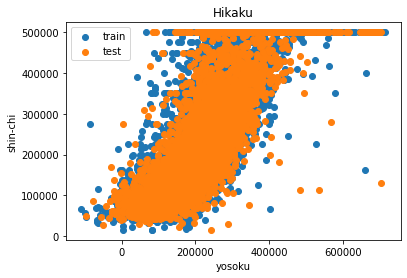

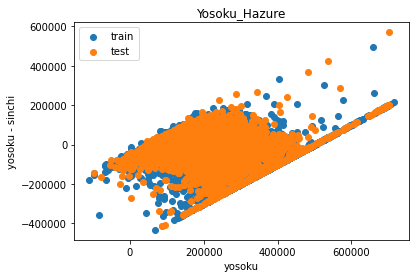

In [ ]:
# Ridge回帰を使って学習する
rdg =Ridge().fit(x_train_sca, y_train)

y_train_yosoku = rdg.predict(x_train_sca)
y_test_yosoku = rdg.predict(x_test_sca)
cmp_plt(y_train_yosoku,y_train,y_test_yosoku,y_test)
res_plt(y_train_yosoku,y_train,y_test_yosoku,y_test)

In [ ]:
# Ridge回帰の評価指標値を表示
# テストデータの R2 が最も高かった
print("Train data")
get_eval_score(y_train,y_train_yosoku)
print("Test data")
get_eval_score(y_test,y_test_yosoku)

Train data
 mean absolute error = 52984.88251754902
 mean squared error = 5144424733.223079
 root mean squared error = 71724.64522898024
 R2(kettei keisuu) = 0.613441567337955
Test data
 mean absolute error = 53334.367813027144
 mean squared error = 5344742324.422596
 root mean squared error = 73107.74462683551
 R2(kettei keisuu) = 0.599115300562273


In [ ]:
for i, (col, omomi) in enumerate(zip(df.columns, rdg.coef_[0])):
  print(f"w{i}({col}) = {omomi}")
print(f"b = {rdg.intercept_[0]}")

w0(long.) = -84506.32634607574
w1(lat.) = -87128.38651692511
w2(age) = 15073.34075228939
w3(rooms) = -17568.19880668323
w4(b_rooms) = 21249.529578783153
w5(population) = -2704.614463016959
w6(households) = 8506.887639115836
w7(median_income) = 80902.48802201457
b = 206824.62451550458
